# Steric Parameters Example

The following notebook provides the plot for the steric substituent effect in a version of the NHK reaction.

"Examination of the Role of Taft-Type Steric Parameters in Asymmetric Catalysis." M.S. Sigman, J.J. Miller, *J. Org. Chem.*, **2009**, *74*, 7633-7643. https://doi.org/10.1021/jo901698t

We will plot the results reported in the paper using the Carton parameters ($\upsilon$) as per the authors and using the Taft $E_s$ parameters.

## Setup Tools and Read Substituent Data Table

Here the data table for Hammett substitutent constants is read in and processed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

github_data_location = "https://github.com/blinkletter/LFER-QSAR/blob/main/data/"
github_styles_location = "https://github.com/blinkletter/LFER-QSAR/blob/main/styles/"
github_download = "?raw=True"


################################################################################
### Read data set. The fields are separated by commas; comments are enabled  ###
################################################################################

LFER_file = "Taft_Es_Williams.csv"

data_set = pd.read_csv(github_data_location + LFER_file + github_download,
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Substituent", 
                 comment = "#") 

########################################################
### Sort by Steric Size and display ###
########################################################

data_set.sort_values(by=["E'(s)"], inplace=True)
display(data_set)

,Group,Formula,E(s),sigma*,E'(s),v(x)
Substituent,,,,,,
C(CH3)(CH(CH3)2)C(CH3)3,tBuiPrMeC,C9H19,NaN,NaN,-7.56,NaN
C(CH3)(CH(CH3)2)2,iPr2MeC,C8H17,NaN,NaN,-7.38,NaN
C(C2H5)(CH(CH3)2)2,iPr2EtC,C9H19,NaN,NaN,-7.38,NaN
C(C2H5)2C(CH3)3,tBuEt2C,C9H19,NaN,NaN,-7.21,NaN
CH(C(CH3)3)2,tBu2CH,C9H19,NaN,NaN,-6.97,NaN
...,...,...,...,...,...,...
(CH2)7CH3,n-C8H17,C8H17,-0.33,NaN,NaN,0.68
NO2,NO2,NO2,NaN,4.25,NaN,NaN
CH2OCH3,CH2OCH3,C2H5O,NaN,0.52,NaN,NaN


## Read Experimental Data
Here the data from the publication is read in. It had been saved in a csv file. the data is from...

"Examination of the Role of Taft-Type Steric Parameters in Asymmetric Catalysis." M.S. Sigman, J.J. Miller, *J. Org. Chem.*, **2009**, *74*, 7633-7643. https://doi.org/10.1021/jo901698t

In [2]:
############################################
### Read in data from literature example ###
############################################

df = pd.read_csv("data2.csv", 
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Substituent", 
                 comment = "#") 
print(df)

###
### Note: "rel. rate" is the k_obs reported by the authors. the "math"
### column is their strange calculation for the k_2 value. I cannot
### match their approach and have no idea how they calculated those
### values. See the note below on why you should document your treatment of
### data in notebooks like this one. I will only use the ralative rate data. 

              Ligand        Group  Ph(CO)H  PhCH2CH2(CO)H  Ph(CO)CH3
Substituent                                                         
C(CH3)3           1a         t-Bu     96.0           74.0       69.0
CH3               1b           Me     60.0           51.0       25.0
C2H5              1c           Et     65.5           52.5       24.0
CH(CH3)2          1d         i-Pr     82.5           56.5       37.5
1-Adamantyl       1e  1-Adamantyl     96.0           73.5       72.0
CH(C3H7)2         1f      n-Pr2CH     73.0            NaN       37.5
CH(CH(CH3)2)2     1g      i-Pr2CH     77.5            NaN       55.0
C(C2H5)3          1h      Et3C        91.5            NaN       61.5


## Combine Data Sets

Both data sets are indexed by "Substituent". The code below will combine the two data sets according to "Substituent" and take the intersection of the sets.

In [3]:
result = pd.concat([data_set, df], axis=1, join="inner")
display(result)

,Group,Formula,E(s),sigma*,E'(s),v(x),Ligand,Group,Ph(CO)H,PhCH2CH2(CO)H,Ph(CO)CH3
Substituent,,,,,,,,,,,
C(C2H5)3,Et3C,C7H15,-3.80,NaN,-5.29,2.38,1h,Et3C,91.5,NaN,61.5
CH(CH(CH3)2)2,iPr2CH,C7H15,NaN,NaN,-5.01,1.70,1g,i-Pr2CH,77.5,NaN,55.0
CH(C3H7)2,nPr2CH,C7H15,-2.11,NaN,-2.03,1.54,1f,n-Pr2CH,73.0,NaN,37.5
C(CH3)3,t-Bu,C4H9,-1.54,-0.30,-1.43,1.24,1a,t-Bu,96.0,74.0,69.0
CH(CH3)2,i-Pr,C3H7,-0.47,-0.19,-0.48,0.76,1d,i-Pr,82.5,56.5,37.5
C2H5,Et,C2H5,-0.07,-0.10,-0.06,0.56,1c,Et,65.5,52.5,24.0
CH3,Me,CH3,0.00,0.00,0.00,0.52,1b,Me,60.0,51.0,25.0
1-Adamantyl,1-Adamantyl,C10H15,NaN,NaN,NaN,1.33,1e,1-Adamantyl,96.0,73.5,72.0


## Trim Data

The ligands are described by the "ligand" column and the "Substituent" index column contains the structure of the varying substituent in those ligands. We do not need "Group", "Formula" or "sigma*" We will keep all the parameters for now as we may chose to plot against any of them as we explore the data.

In [4]:
result.drop(labels = ["sigma*", "Formula", "Group"], axis = 1, inplace = True)
display(result)

,E(s),E'(s),v(x),Ligand,Ph(CO)H,PhCH2CH2(CO)H,Ph(CO)CH3
Substituent,,,,,,,
C(C2H5)3,-3.80,-5.29,2.38,1h,91.5,NaN,61.5
CH(CH(CH3)2)2,NaN,-5.01,1.70,1g,77.5,NaN,55.0
CH(C3H7)2,-2.11,-2.03,1.54,1f,73.0,NaN,37.5
C(CH3)3,-1.54,-1.43,1.24,1a,96.0,74.0,69.0
CH(CH3)2,-0.47,-0.48,0.76,1d,82.5,56.5,37.5
C2H5,-0.07,-0.06,0.56,1c,65.5,52.5,24.0
CH3,0.00,0.00,0.52,1b,60.0,51.0,25.0
1-Adamantyl,NaN,NaN,1.33,1e,96.0,73.5,72.0


## Process Data
The calculations and cross refernces to build the final data table are made. The log of the enatiomeric ratio is calculated from the percent R for the reactants Ph(CO)H, PhCH2CH2(CO)H, Ph(CO)CH3.

In [5]:
#################################################################
### calculate log(er) and for each column of results ###
#################################################################
df = result.copy()

df["Ph(CO)H_log_er"] = np.log10(df["Ph(CO)H"] / (100 - df["Ph(CO)H"]))
df["PhCH2CH2(CO)H_log_er"] = np.log10(df["PhCH2CH2(CO)H"] / (100 - df["PhCH2CH2(CO)H"]))
df["Ph(CO)CH3_log_er"] = np.log10(df["Ph(CO)CH3"] / (100 - df["Ph(CO)CH3"]))

#df.dropna(inplace=True)
print(df)

               E(s)  E'(s)  v(x) Ligand  Ph(CO)H  PhCH2CH2(CO)H  Ph(CO)CH3  \
Substituent                                                                  
C(C2H5)3      -3.80  -5.29  2.38     1h     91.5            NaN       61.5   
CH(CH(CH3)2)2   NaN  -5.01  1.70     1g     77.5            NaN       55.0   
CH(C3H7)2     -2.11  -2.03  1.54     1f     73.0            NaN       37.5   
C(CH3)3       -1.54  -1.43  1.24     1a     96.0           74.0       69.0   
CH(CH3)2      -0.47  -0.48  0.76     1d     82.5           56.5       37.5   
C2H5          -0.07  -0.06  0.56     1c     65.5           52.5       24.0   
CH3            0.00   0.00  0.52     1b     60.0           51.0       25.0   
1-Adamantyl     NaN    NaN  1.33     1e     96.0           73.5       72.0   

               Ph(CO)H_log_er  PhCH2CH2(CO)H_log_er  Ph(CO)CH3_log_er  
Substituent                                                            
C(C2H5)3             1.032002                   NaN          0.203414  
CH(

## Select Data Series and then Plot
below the x and y values to plot are selected. The x values are the Yukawa-Tsuno $\sigma$ values using the optimized value for $r$ that is determined in the sections below. Also selected were alternate x values (x1 and x2) to plot the unaltered $\sigma$ and $\sigma^+$ values on the plot as well.

The plotting code that follows was altered to add in the plots for the x1 and x2 series.

slope1 = 0.7183
intercept1 = -0.679
RSQ_1 = 0.999760

slope1 = 1.5159
intercept1 = -0.559
RSQ_1 = 0.986002
slope1 = 0.4069
intercept1 = -0.739
RSQ_1 = 0.681940

slope1 = 1.1567
intercept1 = -1.109
RSQ_1 = 0.995628


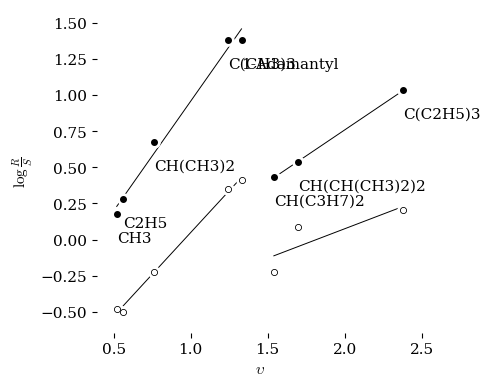

Substituent
CH3              0.52
C2H5             0.56
CH(CH3)2         0.76
C(CH3)3          1.24
1-Adamantyl      1.33
CH(C3H7)2        1.54
CH(CH(CH3)2)2    1.70
C(C2H5)3         2.38
Name: v(x), dtype: float64 Substituent
CH3              0.176091
C2H5             0.278422
CH(CH3)2         0.673416
C(CH3)3          1.380211
1-Adamantyl      1.380211
CH(C3H7)2        0.431959
CH(CH(CH3)2)2    0.537119
C(C2H5)3         1.032002
Name: Ph(CO)H_log_er, dtype: float64


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress

#####################################################
### Get series of data to plot from the dataframe ###
#####################################################

df.sort_values(by=["v(x)"], inplace=True)
x = df["v(x)"]
y =  df["Ph(CO)H_log_er"]
y2 = df["Ph(CO)CH3_log_er"]

### Pick out the two parts of the plot. I visually inspected the plot and then
### chose the first 3 of 5 data points for one series and the last 3 of 5
### for the other series.  I used these two sets to plot the slopes of the
### lines in these regions to get the reaction constant, rho, for each
### section of the curved plot.  I altered the plotting code below to use 
### these two extra data sets.

### This will pick the section of the plot with the HIGHER sigma values
topx = x[0:5]     # Python numbers arrays from 0. This will slice of positipns 0,1,2 and 3.
topy = y[0:5]
topy2 = y2[0:5]

### This will pick the section of the plot with the LOWER sigma values
botx = x[5:8]     # This will slice of positipns 4,5 and 6.
boty = y[5:8]
boty2 = y2[5:8]


##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"

style_name = github_styles_location + style + github_download
plt.style.use(style_name)        

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   


#########################################
### Plot the data and the line fit.   ###
#########################################


    
#ax.plot(x, y, color='black', zorder=1, linewidth=0.7)

ax.scatter(x,y, s=64, color="white", zorder=3)
ax.scatter(x,y, s=16, color="black", zorder=3)

#ax.plot(x, y, color='black', zorder=1, linewidth=0.7)

ax.scatter(x,y2, s=64, color="white", zorder=3)
ax.scatter(x,y2, s=16, color="black", zorder=3)
ax.scatter(x,y2, s=8, color="white", zorder=3)



if True:   # Flag to run or not. True = run this section, False = skip it
    linfit = linregress(botx,boty)
    fity = linfit.slope * botx + linfit.intercept
    ax.plot(botx, fity, color='black', zorder=1, linewidth=0.7)
    print(f"slope1 = {linfit.slope:0.4f}")
    print(f"intercept1 = {linfit.intercept:0.3f}")
    print(f"RSQ_1 = {(linfit.rvalue**2):0.6f}")
    print()
    linfit = linregress(topx,topy)
    fity = linfit.slope * topx + linfit.intercept
    ax.plot(topx, fity, color='black', zorder=1, linewidth=0.7)
    print(f"slope1 = {linfit.slope:0.4f}")
    print(f"intercept1 = {linfit.intercept:0.3f}")
    print(f"RSQ_1 = {(linfit.rvalue**2):0.6f}")

if True:   # Flag to run or not. True = run this section, False = skip it
    linfit = linregress(botx,boty2)
    fity = linfit.slope * botx + linfit.intercept
    ax.plot(botx, fity, color='black', zorder=1, linewidth=0.7)
    print(f"slope1 = {linfit.slope:0.4f}")
    print(f"intercept1 = {linfit.intercept:0.3f}")
    print(f"RSQ_1 = {(linfit.rvalue**2):0.6f}")
    print()
    linfit = linregress(topx,topy2)
    fity = linfit.slope * topx + linfit.intercept
    ax.plot(topx, fity, color='black', zorder=1, linewidth=0.7)
    print(f"slope1 = {linfit.slope:0.4f}")
    print(f"intercept1 = {linfit.intercept:0.3f}")
    print(f"RSQ_1 = {(linfit.rvalue**2):0.6f}")
    
############################
### Set labels and scale ###
############################

ax.set(ylabel=r"$\log{\frac{R}{S}}$", 
       xlabel=r"$\upsilon$",
#          xlim=[-.4,.6],                  
#          ylim=[-.85,0.15]
      
      )

ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   
############################
### Print labels on plot ###
############################

if True:      # Change to True to add annotations to the plot 
   names = list(df.index)
   for name,x_loc,y_loc in zip(names,x,y):
       plt.annotate(name,             # this is the text
                 (x_loc,y_loc),       # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-20),      # distance from text to points (x,y)
                 ha='left')           # horizontal alignment can be left, right or center


#############################
### Output the final plot ###
#############################

#fig.savefig("plot.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots


#####################################
### Print the line fit parameters ###
#####################################

if False:         # Change to True to print a linear line fit results
    print(f"slope = {linfit.slope:0.4f}")
    print(f"intercept = {linfit.intercept:0.3f}")
    print(f"RSQ = {(linfit.rvalue**2):0.6f}")

print(x,y)

In [7]:
#################################################################
### calculate log(er) and for each column of results ###
#################################################################
df = result.copy()

df["Ph(CO)H_log_er"] = np.log10(df["Ph(CO)H"] / (100 - df["Ph(CO)H"]))
df["PhCH2CH2(CO)H_log_er"] = np.log10(df["PhCH2CH2(CO)H"] / (100 - df["PhCH2CH2(CO)H"]))
df["Ph(CO)CH3_log_er"] = np.log10(df["Ph(CO)CH3"] / (100 - df["Ph(CO)CH3"]))


df1 = df.filter(items=["E'(s)", "Ph(CO)H_log_er", "Ph(CO)CH3_log_er"])
df1.dropna(inplace=True)

display(df1)

,E'(s),Ph(CO)H_log_er,Ph(CO)CH3_log_er
Substituent,,,
C(C2H5)3,-5.29,1.032002,0.203414
CH(CH(CH3)2)2,-5.01,0.537119,0.087150
CH(C3H7)2,-2.03,0.431959,-0.221849
C(CH3)3,-1.43,1.380211,0.347487
CH(CH3)2,-0.48,0.673416,-0.221849
C2H5,-0.06,0.278422,-0.500602
CH3,0.00,0.176091,-0.477121


slope1 = 0.1229
intercept1 = 0.162
RSQ_1 = 0.480612

slope1 = 0.8240
intercept1 = 0.221
RSQ_1 = 0.993646
slope1 = 0.1195
intercept1 = -0.468
RSQ_1 = 0.964292

slope1 = 0.5960
intercept1 = -0.507
RSQ_1 = 0.996229


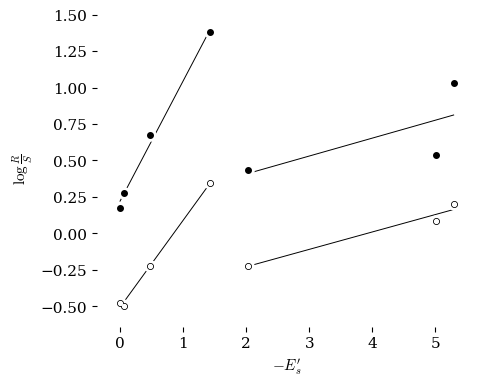

Substituent
CH3             -0.00
C2H5             0.06
CH(CH3)2         0.48
C(CH3)3          1.43
CH(C3H7)2        2.03
CH(CH(CH3)2)2    5.01
C(C2H5)3         5.29
Name: E'(s), dtype: float64 Substituent
CH3              0.176091
C2H5             0.278422
CH(CH3)2         0.673416
C(CH3)3          1.380211
CH(C3H7)2        0.431959
CH(CH(CH3)2)2    0.537119
C(C2H5)3         1.032002
Name: Ph(CO)H_log_er, dtype: float64


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress

#####################################################
### Get series of data to plot from the dataframe ###
#####################################################


df1.sort_values(by=["E'(s)"], ascending=False, inplace=True)
x = -df1["E'(s)"]
y =  df1["Ph(CO)H_log_er"]
y2 = df1["Ph(CO)CH3_log_er"]

### Pick out the two parts of the plot. I visually inspected the plot and then
### chose the first 3 of 5 data points for one series and the last 3 of 5
### for the other series.  I used these two sets to plot the slopes of the
### lines in these regions to get the reaction constant, rho, for each
### section of the curved plot.  I altered the plotting code below to use 
### these two extra data sets.

### This will pick the section of the plot with the HIGHER sigma values
topx = x[0:4]     # Python numbers arrays from 0. This will slice of positipns 0,1,2 and 3.
topy = y[0:4]
topy2 = y2[0:4]

### This will pick the section of the plot with the LOWER sigma values
botx = x[4:7]     # This will slice of positipns 4,5 and 6.
boty = y[4:7]
boty2 = y2[4:7]


##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"

style_name = github_styles_location + style + github_download
plt.style.use(style_name)        

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   


#########################################
### Plot the data and the line fit.   ###
#########################################


    
#ax.plot(x, y, color='black', zorder=1, linewidth=0.7)

ax.scatter(x,y, s=64, color="white", zorder=3)
ax.scatter(x,y, s=16, color="black", zorder=3)

ax.scatter(x,y2, s=64, color="white", zorder=3)
ax.scatter(x,y2, s=16, color="black", zorder=3)
ax.scatter(x,y2, s=8, color="white", zorder=3)



if True:   # Flag to run or not. True = run this section, False = skip it
    linfit = linregress(botx,boty)
    fity = linfit.slope * botx + linfit.intercept
    ax.plot(botx, fity, color='black', zorder=1, linewidth=0.7)
    print(f"slope1 = {linfit.slope:0.4f}")
    print(f"intercept1 = {linfit.intercept:0.3f}")
    print(f"RSQ_1 = {(linfit.rvalue**2):0.6f}")
    print()
    linfit = linregress(topx,topy)
    fity = linfit.slope * topx + linfit.intercept
    ax.plot(topx, fity, color='black', zorder=1, linewidth=0.7)
    print(f"slope1 = {linfit.slope:0.4f}")
    print(f"intercept1 = {linfit.intercept:0.3f}")
    print(f"RSQ_1 = {(linfit.rvalue**2):0.6f}")

if True:   # Flag to run or not. True = run this section, False = skip it
    linfit = linregress(botx,boty2)
    fity = linfit.slope * botx + linfit.intercept
    ax.plot(botx, fity, color='black', zorder=1, linewidth=0.7)
    print(f"slope1 = {linfit.slope:0.4f}")
    print(f"intercept1 = {linfit.intercept:0.3f}")
    print(f"RSQ_1 = {(linfit.rvalue**2):0.6f}")
    print()
    linfit = linregress(topx,topy2)
    fity = linfit.slope * topx + linfit.intercept
    ax.plot(topx, fity, color='black', zorder=1, linewidth=0.7)
    print(f"slope1 = {linfit.slope:0.4f}")
    print(f"intercept1 = {linfit.intercept:0.3f}")
    print(f"RSQ_1 = {(linfit.rvalue**2):0.6f}")
    
############################
### Set labels and scale ###
############################

ax.set(ylabel=r"$\log{\frac{R}{S}}$", 
       xlabel=r"$-E^\prime_s$",
#          xlim=[-.4,.6],                  
#          ylim=[-.85,0.15]
      
      )

ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   
############################
### Print labels on plot ###
############################

if False:      # Change to True to add annotations to the plot 
   names = list(df.index)
   for name,x_loc,y_loc in zip(names,x,y):
       plt.annotate(name,             # this is the text
                 (x_loc,y_loc),       # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-20),      # distance from text to points (x,y)
                 ha='left')           # horizontal alignment can be left, right or center


#############################
### Output the final plot ###
#############################

#fig.savefig("plot.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots


#####################################
### Print the line fit parameters ###
#####################################

if False:         # Change to True to print a linear line fit results
    print(f"slope = {linfit.slope:0.4f}")
    print(f"intercept = {linfit.intercept:0.3f}")
    print(f"RSQ = {(linfit.rvalue**2):0.6f}")

print(x,y)

## Correlation between Charon and Taft parameters.

We have a data set of bot taft and charton parameters. Let us plot them against each other.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress

################################################################################
### Read data set. The fields are separated by commas; comments are enabled  ###
################################################################################

LFER_file = "Taft_Es_Williams.csv"

data_set = pd.read_csv(github_data_location + LFER_file + github_download,
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Substituent", 
                 comment = "#") 

########################################################
### Sort by Steric Size and display ###
########################################################

data_set.sort_values(by=["E'(s)"], inplace=True)
#display(data_set)

params = data_set.filter(items=["E'(s)", "v(x)"])
#print(params)
params.dropna(inplace=True)
#params.drop(labels = ["C(CH3)2C(CH3)3", "C(C2H5)3", "CH(CH(CH3)2)2", "CH2CH(CH3)C2H5"], axis = 0, inplace = True)

#data_set.sort_values(by=["E'(s)"], inplace=True)

#params

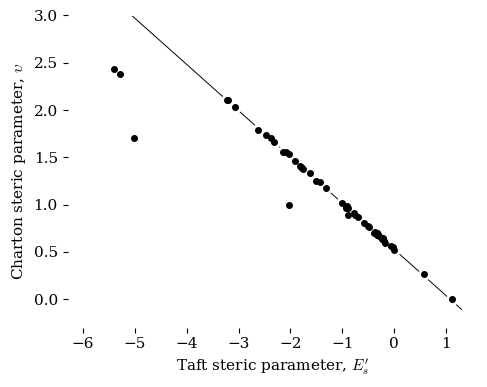

slope = 0.5960
intercept = -0.507
RSQ = 0.996229


In [10]:
x = params["E'(s)"]
y = params["v(x)"]


##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"

style_name = github_styles_location + style + github_download
plt.style.use(style_name)        

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   


#########################################
### Plot the data and the line fit.   ###
#########################################


    
#ax.plot(x, y, color='black', zorder=1, linewidth=0.7)

ax.scatter(x,y, s=64, color="white", zorder=3)
ax.scatter(x,y, s=16, color="black", zorder=3)


if False:   # Flag to run or not. True = run this section, False = skip it
    linfit = linregress(x,y)
    fity = linfit.slope * x + linfit.intercept
    ax.plot(x, fity, color='black', zorder=1, linewidth=0.7)

if True:
    slope = -0.4883
    intercept = 0.529
    xlist = np.linspace(-6.0,1.3,100)
    ylist=intercept+slope*xlist
    ax.plot(xlist, ylist, color='black', zorder=1, linewidth=0.7)
    
    
############################
### Set labels and scale ###
############################

ax.set(ylabel=r"Charton steric parameter, $\upsilon$", 
       xlabel=r"Taft steric parameter, $E^{\prime}_s$",
          xlim=[-6.3,1.6],                  
          ylim=[-0.3,3.0]
      
      )
ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   

############################
### Print labels on plot ###
############################

if False:      # Change to True to add annotations to the plot 
   names = list(params.index)
   for name,x_loc,y_loc in zip(names,x,y):
       plt.annotate(name,             # this is the text
                 (x_loc,y_loc),          # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-20),  # distance from text to points (x,y)
                 ha='left')      # horizontal alignment can be left, right or center


#############################
### Output the final plot ###
#############################

#fig.savefig("plotR.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots


#####################################
### Print the line fit parameters ###
#####################################

if True:         # Change to True to print a linear line fit results
    print(f"slope = {linfit.slope:0.4f}")
    print(f"intercept = {linfit.intercept:0.3f}")
    print(f"RSQ = {(linfit.rvalue**2):0.6f}")
